In [ ]:
# %matplotlib inline
# import matplotlib as mpl  # 기본 설정
# import matplotlib.pyplot as plt  # 그래프 그리기
# import matplotlib.font_manager as fm  # 폰트 관리

# !apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
# !apt-get install fonts-nanum* -qq #나눔글꼴 설치
# fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
# fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
# plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
# mpl.rcParams['axes.unicode_minus'] = False

# 데이터 전처리

In [ ]:
# prompt: 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime
#import nltk
import pandas as pd
import numpy as np
##import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
#주가데이터 가져오기

#모델 라이브러리
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.svm import SVC

#모델저장 라이브러리
import pickle
import os

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/KDT/찐찐최종/1조_데이터.xlsx')

In [ ]:
df.head()
df = df.drop(columns=['Unnamed: 0'])
# df = df.drop(columns=['N장애인고용률'])

## 변수 추가 & 파생 변수 생성

In [ ]:
wage_increase_percentages_complete = {
    2019: 10.9,
    2020: 2.8,
    2021: 1.5,
    2022: 5.05,
    2023: 5.0
}
# 데이터프레임에 상승률 추가
df['wage_increase_percentage'] = df['years'].map(wage_increase_percentages_complete)

In [ ]:
df['장애인고용률'] = df['장애인고용률'].fillna(3.4)
df['장애인근로자수']=df['장애인근로자수'].fillna(df['직원 수']*0.03)

In [ ]:
#df = df.drop(columns=['기업규모','상시근로자수','장애인고용의무인원','장애인근로자수','장애인고용률'])
df = df.drop(columns=['기업규모','장애인고용의무인원','상시근로자수'])

In [ ]:
df['비지배주주순이익'] = df['비지배주주순이익'].fillna(0)

In [ ]:
df.describe()

,index,years,stock_code,매출액,영업이익,영업이익(발표기준),당기순이익,지배주주순이익,비지배주주순이익,자산총계,...,N여성 직원 수,기업분류,장애인근로자수,장애인고용률,E_value,S_value,G_value,재무_value,성장성_value,wage_increase_percentage
count,3984,3984.000000,3984.000000,3.979000e+03,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3.984000e+03,...,3984.000000,3984.000000,3302.000000,3984.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,3984.000000
mean,2022-01-24 21:18:04.337349376,2021.155120,58414.530622,3.144493e+04,1791.805723,1798.265311,1282.763052,1159.503514,123.272088,4.633155e+04,...,1.496486,4.255522,52.524343,3.197530,-0.928820,1.335615,0.741693,1.982759,0.033936,5.031288
min,2019-06-01 00:00:00,2019.000000,20.000000,2.200000e+01,-326552.000000,-326552.000000,-244291.000000,-244669.000000,-8041.000000,2.070000e+02,...,0.000000,1.000000,0.000000,0.000000,-1.512055,-0.108837,0.107797,0.374947,0.001609,1.500000
25%,2020-12-01 00:00:00,2020.000000,5360.000000,1.836000e+03,19.000000,20.000000,-16.000000,-16.000000,0.000000,2.704000e+03,...,0.000000,4.000000,4.000000,3.400000,-1.512055,0.702948,0.411368,1.193568,0.027996,2.800000
50%,2021-12-01 00:00:00,2021.000000,16765.000000,4.993000e+03,202.500000,203.000000,138.000000,129.500000,0.000000,6.149500e+03,...,1.500000,5.000000,9.450000,3.400000,-1.512055,1.290370,0.760539,1.850048,0.028744,5.000000
75%,2022-12-01 00:00:00,2022.000000,80370.000000,1.542300e+04,838.500000,843.250000,582.000000,529.250000,11.000000,1.842275e+04,...,2.000000,5.000000,26.700000,3.400000,-0.332849,1.955073,1.003588,2.777718,0.029560,5.050000
max,2023-12-01 00:00:00,2023.000000,383800.000000,3.022314e+06,516339.000000,516339.000000,556541.000000,547300.000000,37403.000000,4.559060e+06,...,3.000000,5.000000,7488.240000,3.400000,1.342705,3.954483,1.834767,6.103574,0.298262,10.900000
std,NaN,1.421132,84025.606101,1.335134e+05,15510.599628,15518.902402,14331.293671,14031.237201,1029.987765,2.227863e+05,...,1.120860,1.017285,283.239278,0.711718,0.752278,0.747557,0.396805,1.012415,0.034705,3.047596


In [ ]:
df['EPS(원)'].describe()

count      3984.000000
mean       2465.851908
std       11621.048142
min     -128166.000000
25%         -48.000000
50%         498.500000
75%        2366.500000
max      284142.000000
Name: EPS(원), dtype: float64

In [ ]:
#df['PER'] = df.apply(lambda row: row['발행주식수'] / row['EPS(원)'] if pd.notna(row['EPS(원)']) and row['EPS(원)'] != 0 else None if pd.isna(row['PER']) else row['PER'], axis=1)
df['PER'].fillna(0, inplace=True)

In [ ]:
df['RE100'].fillna(0, inplace=True)

In [ ]:
#df.drop(columns=['RE100'], inplace=True)

In [ ]:
df['총 평균급여'] = (df['남성 평균 연봉'] * df['남성 정규직 수'] + df['여성 평균 연봉'] * df['여성 정규직 수'])
#df['정규직 비율'] = df['여성 정규직 비율'] * df['여성 직원 비율'] + df['남성 정규직 비율'] * df['남성 직원 비율']]
df['지배주주이익'] = df['당기순이익'] *df['지배주주지분']
#df['지배주주지분비율'] = df['지배주주지분'] / df['자본총계']
df['비지배주주이익'] = df['당기순이익'] *df['비지배주주지분']

In [ ]:
df['지배주주지분가치'] = df['지배주주지분'] * df['시가총액']

In [ ]:
# df['비지배주주지분가치'] = df['비지배주주지분'] * df['시가총액']

In [ ]:
"""
df['시가총액 대비 상장주식수 비율'] = df['시가총액'] / df['상장주식수']

df['외국인 지분금액']=df['외국인 지분율']*df['시가총액']

df['외국인 보유시가총액'] = df['외국인 보유수량'] / df['시가총액']
"""

"\ndf['시가총액 대비 상장주식수 비율'] = df['시가총액'] / df['상장주식수']\n\ndf['외국인 지분금액']=df['외국인 지분율']*df['시가총액']\n\ndf['외국인 보유시가총액'] = df['외국인 보유수량'] / df['시가총액']\n"

In [ ]:
#가장 높은 방식으로 60%
df['총임원수변화율'] = df.groupby(['회사명'], group_keys=False)['총 임원 수'].apply(lambda x: (x.diff()+1 / (x + 1)) * 100)
df['총임원수변화율'] = df['총임원수변화율'].fillna(1)


# 회사명을 기준으로 그룹화하고 직원변화율 계산
df['총직원수변화율'] = df.groupby(['회사명'],group_keys=False)['직원 수'].apply(lambda x: x.diff()+1 / (x+1) * 100)
df['총직원수변화율'] = df['총직원수변화율'].fillna(1)


df['총 평균급여변화율'] = df.groupby(['회사명'],group_keys=False)['총 평균급여'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 평균급여변화율'] = df['총 평균급여변화율'].fillna(1)

df['총 PBR변화율'] = df.groupby(['회사명'],group_keys=False)['PBR'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 PBR변화율'] = df['총 PBR변화율'].fillna(1)

df['총 자본총계변화율'] = df.groupby(['회사명'],group_keys=False)['자본총계'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 자본총계변화율'] = df['총 자본총계변화율'].fillna(1)

df['총 부채총계변화율'] = df.groupby(['회사명'],group_keys=False)['부채총계'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 부채총계변화율'] = df['총 부채총계변화율'].fillna(1)

df['총 외국인 보유수량변화율'] = df.groupby(['회사명'],group_keys=False)['외국인 보유수량'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 외국인 보유수량변화율'] = df['총 외국인 보유수량변화율'].fillna(1)

df['총 외국인 지분율변화율'] = df.groupby(['회사명'],group_keys=False)['외국인 지분율'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 외국인 지분율변화율'] = df['총 외국인 지분율변화율'].fillna(1)

df['총 시가총액변화율'] = df.groupby(['회사명'],group_keys=False)['시가총액'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 시가총액변화율'] = df['총 시가총액변화율'].fillna(1)


df['총 여성 임원 수변화율'] = df.groupby(['회사명'],group_keys=False)['여성 임원 수 '].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 여성 임원 수변화율'] = df['총 여성 임원 수변화율'].fillna(1)

df['총 외국인 보유수량변화율'] = df.groupby(['회사명'],group_keys=False)['외국인 보유수량'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 외국인 보유수량변화율'] = df['총 외국인 보유수량변화율'].fillna(1)

df['주가'] = df['시가총액'] / df['발행주식수']

df['총 주가변화율'] = df.groupby(['회사명'],group_keys=False)['주가'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 주가변화율'] = df['총 주가변화율'].fillna(1)


df = df.drop(columns=['주가'])
"""
df['총 여성 직원 수변화율'] = df.groupby(['회사명'],group_keys=False)['여성 직원 수'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 여성 직원 수변화율'] = df['총 여성 직원 수변화율'].fillna(1)


df['총 발행주식수변화율'] = df.groupby(['회사명'],group_keys=False)['발행주식수'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 발행주식수변화율'] = df['총 발행주식수변화율'].fillna(1)


df['총 BPS(원)변화율'] = df.groupby(['회사명'],group_keys=False)['BPS(원)'].apply(lambda x: (x.diff()+1) / (x+1) * 100)
df['총 BPS(원)변화율'] = df['총 BPS(원)변화율'].fillna(df['BPS(원)'])
"""

"\ndf['총 여성 직원 수변화율'] = df.groupby(['회사명'],group_keys=False)['여성 직원 수'].apply(lambda x: (x.diff()+1) / (x+1) * 100)\ndf['총 여성 직원 수변화율'] = df['총 여성 직원 수변화율'].fillna(1)\n\n\ndf['총 발행주식수변화율'] = df.groupby(['회사명'],group_keys=False)['발행주식수'].apply(lambda x: (x.diff()+1) / (x+1) * 100)\ndf['총 발행주식수변화율'] = df['총 발행주식수변화율'].fillna(1)\n\n\ndf['총 BPS(원)변화율'] = df.groupby(['회사명'],group_keys=False)['BPS(원)'].apply(lambda x: (x.diff()+1) / (x+1) * 100)\ndf['총 BPS(원)변화율'] = df['총 BPS(원)변화율'].fillna(df['BPS(원)'])\n"

In [ ]:
df['총임원수변화율_abs']=df['총임원수변화율'].abs()

In [ ]:
# 2023 , 2019 년도 제거
df = df[(df['years'] != 2019) & (df['years'] != 2023)]

df = df.reset_index(drop=True)

In [ ]:
df['정규직비율'] = (df['남성 정규직 수'] + df['여성 정규직 수']) / (df['남성 직원 수'] + df['여성 직원 수'])
df[['정규직비율','여성 직원 수','여성 정규직 수']].describe()

,정규직비율,여성 직원 수,여성 정규직 수
count,2337.000000,2337.000000,2337.000000
mean,0.934897,446.408216,413.925973
std,0.105675,2443.626436,2416.571859
min,0.000000,0.000000,0.000000
25%,0.928144,19.000000,17.000000
50%,0.968504,58.000000,52.000000
75%,0.993395,220.000000,192.000000
max,1.000000,63686.000000,63450.000000


In [ ]:
df['종합등급'].value_counts()

종합등급
C     684
D     504
A     419
B+    384
B     340
A+     27
Name: count, dtype: int64

In [ ]:
# 시가총액*유보율
df['시가총액_유보율'] = df['시가총액'] * df['유보율']

# 임직원수
df['임직원수'] =  df['직원 수'] + df['총 임원 수']

df['조직의변화율'] = df.groupby(['회사명'], group_keys=False)['임직원수'].apply(lambda x: (x.diff()+1 / (x + 1)) * 100)
df['조직의변화율'] = df['조직의변화율'].fillna(1)

# 시가총액 * 배당수익률
df['시가총액_배당수익률'] = df['시가총액'] * df['배당수익률']

# 환경지표
df['환경지표'] = (df['에너지 총량 등급'] * df['온실가스 배출총량 등급'] * df['용수 사용량 등급']) / 3

# 효율성지표
df['효율성지표'] = df['매출액'] / df['자산총계']

# 임직원수 drop
df = df.drop(columns=['임직원수'])

In [ ]:
#df에 연도컬럼 제거
df = df.drop(columns=['years','stock_code','용수 사용량(Ton)','에너지 총량(TJ)','온실가스 배출총량(TonCo2eq)', 'PER','회사명'])
df=df.dropna()
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

index                       0
전년도ESG                      0
종합등급                        0
매출액                         0
영업이익                        0
영업이익(발표기준)                  0
당기순이익                       0
지배주주순이익                     0
비지배주주순이익                    0
자산총계                        0
부채총계                        0
자본총계                        0
지배주주지분                      0
비지배주주지분                     0
자본금                         0
부채비율                        0
유보율                         0
영업이익률                       0
지배주주순이익률                    0
ROA                         0
ROE                         0
EPS(원)                      0
BPS(원)                      0
DPS(원)                      0
PBR                         0
발행주식수                       0
배당수익률                       0
지속가능경영 보고서공시여부              0
매출액_상승률(퍼센트)                0
영업이익_상승률                    0
배당수익률_상승률                   0
영업이익률_상승률                   0
이사의 수                       0
사외이사 수    

In [ ]:
### 전년도 ESG 범주화
# 4단계로 나눔
def pre_convert_grade(grade):
    if grade in ['A+']:
        return 3
    if grade in ['A']:
        return 2
    if grade in ['B+']:
        return 1
    if grade in ['B']:
        return 0
    if grade in ['C','.C']:
        return 0
    if grade in ['D']:
        return 0


# apply 메서드와 lambda 함수를 사용하여 종합등급컬럼 생성
df['전년도ESG'] = df['전년도ESG'].apply(lambda x: pre_convert_grade(x))

In [ ]:
df['전년도ESG'].unique()

array([0, 1, 2, 3])

In [ ]:
column_name = '영업이익률_상승률'
column_index = df.columns.get_loc(column_name)
column_index

31

In [ ]:
#df = df.dropna(subset=[ '매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급'])
#df = df.dropna(subset=[ '매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급','사외이사 비율','여성 임원 비율','평균 남성 연봉','평균 여성 연봉','남성 정규직 비율','여성 정규직 비율'])
# df = df.dropna(subset =['매출액','영업이익','당기순이익','지배주주지분','ROA','ROE','유보율','종합등급','지배주주순이익률','BPS(원)'])

In [ ]:
# df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,index,전년도ESG,종합등급,매출액,영업이익,영업이익(발표기준),당기순이익,지배주주순이익,비지배주주순이익,자산총계,...,총 시가총액변화율,총 여성 임원 수변화율,총 주가변화율,총임원수변화율_abs,정규직비율,시가총액_유보율,조직의변화율,시가총액_배당수익률,환경지표,효율성지표
0,2020-12-01,0,B,2721.0,232,232,287,285,2.0,4338,...,57.709924,50.0,57.709926,95.238095,0.979702,6.009890e+14,1.000000,5.049451e+11,41.666667,0.627248
1,2021-12-01,0,C,2930.0,225,225,196,179,17.0,4478,...,-34.589041,25.0,-34.589032,204.347826,0.979508,4.686146e+14,-499.867550,5.015933e+11,41.666667,0.654310
2,2022-12-01,0,C,3404.0,299,299,216,204,12.0,4611,...,-57.667387,40.0,-57.667370,95.454545,0.975515,3.133903e+14,4300.125313,5.017721e+11,41.666667,0.738235
3,2020-12-01,0,C,1178.0,12,12,-115,-81,-34.0,1559,...,49.195206,100.0,13.974146,88.888889,1.000000,-3.642274e+12,1.000000,0.000000e+00,41.666667,0.755613
4,2021-12-01,0,D,1335.0,-27,-27,-119,-95,-25.0,1684,...,-25.104290,100.0,-31.215254,185.714286,1.000000,-3.597451e+12,-1198.305085,0.000000e+00,41.666667,0.792755


In [ ]:
signal_column = df.pop('GICS_Industry')
df.insert(0, 'GICS_Industry', signal_column)
signal_column = df.pop('녹색 기업 지정')
df.insert(0, '녹색 기업 지정', signal_column)
signal_column = df.pop('GICS_Sector')
df.insert(0, 'GICS_Sector', signal_column)
# signal_column = df.pop('비지배주주순이익')
# df.insert(35, '비지배주주순이익', signal_column)
signal_column = df.pop('자산총계')
df.insert(0, '자산총계', signal_column)
signal_column = df.pop('종합등급')
df.insert(0, '종합등급', signal_column)
signal_column = df.pop('index')
df.insert(0, 'index', signal_column)
df.head()

,index,종합등급,자산총계,GICS_Sector,녹색 기업 지정,GICS_Industry,전년도ESG,매출액,영업이익,영업이익(발표기준),...,총 시가총액변화율,총 여성 임원 수변화율,총 주가변화율,총임원수변화율_abs,정규직비율,시가총액_유보율,조직의변화율,시가총액_배당수익률,환경지표,효율성지표
0,2020-12-01,B,4338,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,2721.0,232,232,...,57.709924,50.0,57.709926,95.238095,0.979702,6.009890e+14,1.000000,5.049451e+11,41.666667,0.627248
1,2021-12-01,C,4478,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,2930.0,225,225,...,-34.589041,25.0,-34.589032,204.347826,0.979508,4.686146e+14,-499.867550,5.015933e+11,41.666667,0.654310
2,2022-12-01,C,4611,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,3404.0,299,299,...,-57.667387,40.0,-57.667370,95.454545,0.975515,3.133903e+14,4300.125313,5.017721e+11,41.666667,0.738235
3,2020-12-01,C,1559,Consumer Cyclical,0,Recreational Vehicles,0,1178.0,12,12,...,49.195206,100.0,13.974146,88.888889,1.000000,-3.642274e+12,1.000000,0.000000e+00,41.666667,0.755613
4,2021-12-01,D,1684,Consumer Cyclical,0,Recreational Vehicles,0,1335.0,-27,-27,...,-25.104290,100.0,-31.215254,185.714286,1.000000,-3.597451e+12,-1198.305085,0.000000e+00,41.666667,0.792755


In [ ]:
df['종합등급'].value_counts()

종합등급
C     550
D     407
A     367
B+    330
B     295
A+     25
Name: count, dtype: int64

## 타겟 인코딩

In [ ]:
df_target_enc = df.copy()

In [ ]:
# 4단계로 나눔
def convert_grade(grade):
    if grade in ['A+']:
        return 3
    if grade in ['A']:
        return 2
    if grade in ['B+']:
        return 1
    if grade in ['B']:
        return 0
    if grade in ['C','.C']:
        return 0
    if grade in ['D']:
        return 0

# apply 메서드와 lambda 함수를 사용하여 종합등급컬럼 생성
df_target_enc['종합등급'] = df_target_enc['종합등급'].apply(lambda x: convert_grade(x))

In [ ]:
df

,index,종합등급,자산총계,GICS_Sector,녹색 기업 지정,GICS_Industry,전년도ESG,매출액,영업이익,영업이익(발표기준),...,총 시가총액변화율,총 여성 임원 수변화율,총 주가변화율,총임원수변화율_abs,정규직비율,시가총액_유보율,조직의변화율,시가총액_배당수익률,환경지표,효율성지표
0,2020-12-01,B,4338,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,2721.0,232,232,...,5.770992e+01,50.000000,57.709926,95.238095,0.979702,6.009890e+14,1.000000e+00,5.049451e+11,41.666667,0.627248
1,2021-12-01,C,4478,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,2930.0,225,225,...,-3.458904e+01,25.000000,-34.589032,204.347826,0.979508,4.686146e+14,-4.998675e+02,5.015933e+11,41.666667,0.654310
2,2022-12-01,C,4611,Healthcare,0,Drug Manufacturers - Specialty & Generic,0,3404.0,299,299,...,-5.766739e+01,40.000000,-57.667370,95.454545,0.975515,3.133903e+14,4.300125e+03,5.017721e+11,41.666667,0.738235
3,2020-12-01,C,1559,Consumer Cyclical,0,Recreational Vehicles,0,1178.0,12,12,...,4.919521e+01,100.000000,13.974146,88.888889,1.000000,-3.642274e+12,1.000000e+00,0.000000e+00,41.666667,0.755613
4,2021-12-01,D,1684,Consumer Cyclical,0,Recreational Vehicles,0,1335.0,-27,-27,...,-2.510429e+01,100.000000,-31.215254,185.714286,1.000000,-3.597451e+12,-1.198305e+03,0.000000e+00,41.666667,0.792755
5,2022-12-01,D,1492,Consumer Cyclical,0,Recreational Vehicles,0,1171.0,-62,-62,...,-5.446252e+01,100.000000,-54.462426,14.285714,1.000000,-3.048820e+12,1.694915e+00,0.000000e+00,41.666667,0.784853
6,2020-12-01,C,12649,Consumer Cyclical,0,Textile Manufacturing,0,3292.0,219,219,...,2.516129e+01,100.000000,25.161296,206.666667,0.970370,1.843304e+15,1.000000e+00,3.433488e+11,0.333333,0.260258
7,2021-12-01,D,12708,Consumer Cyclical,0,Textile Manufacturing,0,3834.0,538,538,...,9.818182e+00,100.000000,9.818188,92.857143,0.783251,2.108684e+15,6.700461e+03,3.430336e+11,1.666667,0.301700
8,2022-12-01,C,12483,Consumer Cyclical,0,Textile Manufacturing,0,3892.0,319,319,...,-2.731481e+01,100.000000,-27.314803,7.142857,0.772021,1.666224e+15,-9.995169e+02,3.434585e+11,1.666667,0.311784
9,2020-12-01,B+,38936,Industrials,0,Conglomerates,1,24712.0,1703,1703,...,1.006711e+01,100.000000,10.067115,191.666667,0.992063,2.136969e+15,1.000000e+00,1.926875e+12,41.666667,0.634683


In [ ]:
df_target_enc['전년도ESG'].unique()

array([0, 1, 2, 3])

In [ ]:
df.columns.tolist()

['index',
 '종합등급',
 '자산총계',
 'GICS_Sector',
 '녹색 기업 지정',
 'GICS_Industry',
 '전년도ESG',
 '매출액',
 '영업이익',
 '영업이익(발표기준)',
 '당기순이익',
 '지배주주순이익',
 '비지배주주순이익',
 '부채총계',
 '자본총계',
 '지배주주지분',
 '비지배주주지분',
 '자본금',
 '부채비율',
 '유보율',
 '영업이익률',
 '지배주주순이익률',
 'ROA',
 'ROE',
 'EPS(원)',
 'BPS(원)',
 'DPS(원)',
 'PBR',
 '발행주식수',
 '배당수익률',
 '지속가능경영 보고서공시여부',
 '매출액_상승률(퍼센트)',
 '영업이익_상승률',
 '배당수익률_상승률',
 '영업이익률_상승률',
 '이사의 수',
 '사외이사 수',
 '사외이사 비율',
 '총 임원 수',
 '여성 임원 수 ',
 '여성 임원 비율',
 '남성 평균 연봉',
 '여성 평균 연봉',
 '남성 정규직 수',
 '여성 정규직 수',
 '남성 직원 수',
 '여성 직원 수',
 '직원 수',
 '여성 직원 비율',
 '남성 직원 비율',
 '남성 정규직 비율',
 '여성 정규직 비율',
 '외국인 보유수량',
 '외국인 지분율',
 '시가총액',
 '상장주식수',
 '용수 사용량 등급',
 '에너지 총량 등급',
 '온실가스 배출총량 등급',
 'RE100',
 'high_carbon',
 'sbti',
 '자본비율',
 'N자산총계',
 'N자본총계',
 'N지배주주지분',
 'N시가총액',
 'N부채총계',
 'N매출액',
 'N남성 정규직 수',
 'N남성 직원 수',
 'N직원 수',
 'N사외이사 수',
 'N여성 정규직 수',
 'N여성 직원 수',
 '기업분류',
 '장애인근로자수',
 '장애인고용률',
 'E_value',
 'S_value',
 'G_value',
 '재무_value',
 '성장성_value',
 'wage_increase_percentage',
 

In [ ]:
# 종합등급을 기준으로 GICS_Sector 열을 타겟 인코딩
target_mean_sector = df_target_enc.groupby('GICS_Sector')['종합등급'].mean().to_dict()
df_target_enc['GICS_Sector_encoded'] = df_target_enc['GICS_Sector'].map(target_mean_sector)

# 종합등급을 기준으로 GICS_Industry 열을 타겟 인코딩
target_mean_industry = df_target_enc.groupby('GICS_Industry')['종합등급'].mean().to_dict()
df_target_enc['GICS_Industry_encoded'] = df_target_enc['GICS_Industry'].map(target_mean_industry)

# 종합등급을 기준으로 전년도 ESG 열 타겟 인코딩
target_mean_ESG = df_target_enc.groupby('전년도ESG')['종합등급'].mean().to_dict()
df_target_enc['target_ESG'] = df_target_enc['전년도ESG'].map(target_mean_ESG)

# # 종합등급을 기준으로 업종명 열 타겟 인코딩
# target_mean_업종명 = df_target_enc.groupby('업종명')['종합등급'].mean().to_dict()
# df_target_enc['업종명_encoded'] = df_target_enc['업종명'].map(target_mean_업종명)

In [ ]:
# GICS_Sector, GICS_Industry 전년도ESG 열 제거
df = df_target_enc.drop(columns=['GICS_Sector', 'GICS_Industry', '전년도ESG'])

In [ ]:
'''
columns_to_move = [
    '비지배주주순이익', '이사의 수', '사외이사 수', '사외이사 비율', '총 임원 수', '여성 임원 수', '여성 임원 비율',
    '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수', '여성 직원 수', '직원 수',
    '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율'
]
'''
columns_to_move = [
    '이사의 수', '사외이사 수', '사외이사 비율', '총 임원 수', '여성 임원 수 ', '여성 임원 비율',
    '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수', '여성 직원 수', '직원 수',
    '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율'
]

# 나머지 컬럼 리스트
remaining_columns = [col for col in df.columns if col not in columns_to_move]

# 새로운 컬럼 순서로 데이터프레임 재정렬
new_column_order = remaining_columns + columns_to_move
df = df[new_column_order]

In [ ]:
df['종합등급'].value_counts()

종합등급
0    1252
2     367
1     330
3      25
Name: count, dtype: int64

### K_Means

In [ ]:
# 각 변수에 대해 최적의 클러스터 개수 결정
"""
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt  # matplotlib.pyplot import 추가

np.random.seed(0)
columns = ['매출액', '남성 직원 비율', '여성 직원 비율', '사외이사 비율', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 비율', '여성 정규직 비율']

for col in columns:
    inertia = []
    for k in range(1, 11):  # 시도할 클러스터 개수 범위 설정 (1에서 10까지)
        kmeans = KMeans(n_clusters=k, random_state=0)
        X = df[[col]]
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # 엘보우 메서드 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {col}')  # 컬럼명을 제목에 추가
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()
"""

"\nfrom sklearn.cluster import KMeans\nimport numpy as np\nimport matplotlib.pyplot as plt  # matplotlib.pyplot import 추가\n\nnp.random.seed(0)\ncolumns = ['매출액', '남성 직원 비율', '여성 직원 비율', '사외이사 비율', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 비율', '여성 정규직 비율']\n\nfor col in columns:\n    inertia = []\n    for k in range(1, 11):  # 시도할 클러스터 개수 범위 설정 (1에서 10까지)\n        kmeans = KMeans(n_clusters=k, random_state=0)\n        X = df[[col]]\n        kmeans.fit(X)\n        inertia.append(kmeans.inertia_)\n\n    # 엘보우 메서드 그래프 그리기\n    plt.figure(figsize=(8, 6))\n    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')\n    plt.xlabel('Number of clusters')\n    plt.ylabel('Inertia')\n    plt.title(f'Elbow Method for {col}')  # 컬럼명을 제목에 추가\n    plt.xticks(range(1, 11))\n    plt.grid(True)\n    plt.show()\n"

In [ ]:
# 각 컬럼별 군집 개수
n_clusters_list = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [ ]:
# 각 변수에 대해 다른 클러스터 개수 지정
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt  # matplotlib.pyplot import 추가
columns = ['매출액', '남성 직원 비율', '여성 직원 비율', '사외이사 비율', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 비율', '여성 정규직 비율']
columns = ['매출액', '남성 직원 비율', '여성 직원 비율', '사외이사 비율', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 비율', '여성 정규직 비율','장애인고용률','장애인근로자수']



# 각 변수에 대해 K-means 클러스터링 모델 초기화 및 훈련
for col, n_clusters in zip(columns, n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    X = df[[col]]
    kmeans.fit(X)
    df[f'{col}_cluster'] = kmeans.labels_
df=df.drop(columns=['장애인고용률','장애인근로자수'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 수치형 컬럼 선택

numeric_cols = ['자산총계','매출액','영업이익', '영업이익(발표기준)','당기순이익','지배주주순이익','부채총계','자본총계','지배주주지분','비지배주주지분','자본금','부채비율','유보율','영업이익률','지배주주순이익률','ROA','ROE','EPS(원)','BPS(원)','DPS(원)','PBR','발행주식수','배당수익률',
                '매출액_상승률(퍼센트)', '영업이익_상승률', '배당수익률_상승률', '영업이익률_상승률', '외국인 보유수량','상장주식수',
                '총 평균급여', 'GICS_Sector_encoded', 'GICS_Industry_encoded', 'target_ESG',
                '이사의 수', '사외이사 수', '사외이사 비율', '총 임원 수', '여성 임원 수 ', '여성 임원 비율', '남성 평균 연봉', '여성 평균 연봉', '남성 정규직 수', '여성 정규직 수', '남성 직원 수', '여성 직원 수', '직원 수', '여성 직원 비율', '남성 직원 비율', '남성 정규직 비율', '여성 정규직 비율','지배주주이익','시가총액',
                '외국인 지분율','wage_increase_percentage']

non_numeric_cols = df.columns.difference(numeric_cols)
# 스케일링 적용
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 데이터 예측 분석

In [ ]:
df1 = df.copy()
df1.head()
# df1을 엑셀 파일로 저장
# df1.to_excel('df1.xlsx', index=False)

# '''N여성 정규직 수 남성 정규직 비율_cluster high_carbon N직원 수	RE100 매출액_cluster 장애인근로자수_cluster	총 평균급여변화율''' 제거
# df1.drop(columns=['RE100','N지배주주지분'], inplace=True)
# df1.head()
# df1.to_excel('/content/drive/MyDrive/KDT/최종프로젝트/전처리한데이터_0717.xlsx', index=False)

In [ ]:
df1['종합등급'].value_counts()

종합등급
0    1252
2     367
1     330
3      25
Name: count, dtype: int64

In [ ]:
df1.iloc[0,:]

index                       2020-12-01 00:00:00
종합등급                                          0
자산총계                                   0.000921
녹색 기업 지정                                      0
매출액                                    0.000893
영업이익                                   0.102117
영업이익(발표기준)                             0.102117
당기순이익                                  0.086156
지배주주순이익                                0.088832
비지배주주순이익                                    2.0
부채총계                                   0.000493
자본총계                                   0.000967
지배주주지분                                 0.000944
비지배주주지분                                0.002945
자본금                                    0.007465
부채비율                                   0.009543
유보율                                    0.007381
영업이익률                                  0.905934
지배주주순이익률                                0.20971
ROA                                    0.574609
ROE                                    0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

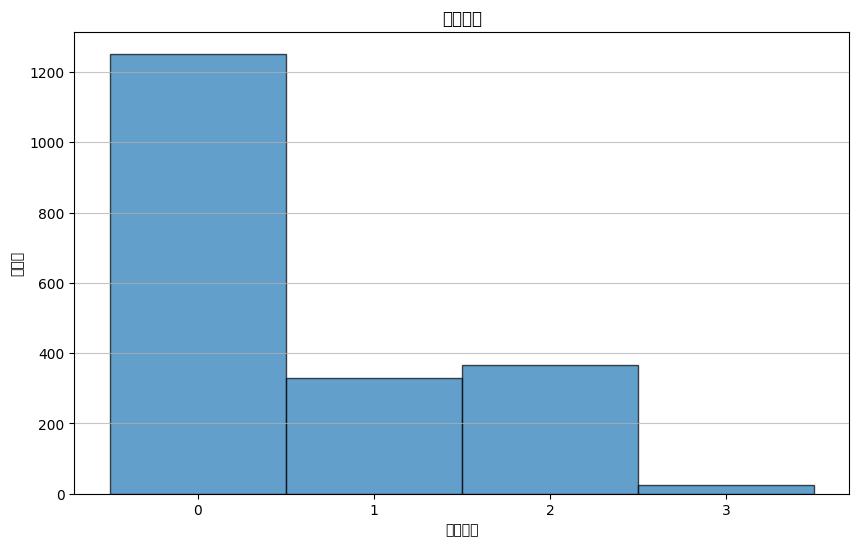

In [ ]:
# # 히스토그램 시각화
# plt.figure(figsize=(10, 6))
# plt.hist(df1['종합등급'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5], edgecolor='black', alpha=0.7)
# plt.xticks([0, 1, 2, 3])  # x축 눈금 설정
# plt.title('종합등급')
# plt.xlabel('종합등급')
# plt.ylabel('빈도수')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

#### SMOTE

In [ ]:
df1.columns.tolist()

['index',
 '종합등급',
 '자산총계',
 '녹색 기업 지정',
 '매출액',
 '영업이익',
 '영업이익(발표기준)',
 '당기순이익',
 '지배주주순이익',
 '비지배주주순이익',
 '부채총계',
 '자본총계',
 '지배주주지분',
 '비지배주주지분',
 '자본금',
 '부채비율',
 '유보율',
 '영업이익률',
 '지배주주순이익률',
 'ROA',
 'ROE',
 'EPS(원)',
 'BPS(원)',
 'DPS(원)',
 'PBR',
 '발행주식수',
 '배당수익률',
 '지속가능경영 보고서공시여부',
 '매출액_상승률(퍼센트)',
 '영업이익_상승률',
 '배당수익률_상승률',
 '영업이익률_상승률',
 '외국인 보유수량',
 '외국인 지분율',
 '시가총액',
 '상장주식수',
 '용수 사용량 등급',
 '에너지 총량 등급',
 '온실가스 배출총량 등급',
 'RE100',
 'high_carbon',
 'sbti',
 '자본비율',
 'N자산총계',
 'N자본총계',
 'N지배주주지분',
 'N시가총액',
 'N부채총계',
 'N매출액',
 'N남성 정규직 수',
 'N남성 직원 수',
 'N직원 수',
 'N사외이사 수',
 'N여성 정규직 수',
 'N여성 직원 수',
 '기업분류',
 'E_value',
 'S_value',
 'G_value',
 '재무_value',
 '성장성_value',
 'wage_increase_percentage',
 '총 평균급여',
 '지배주주이익',
 '비지배주주이익',
 '지배주주지분가치',
 '총임원수변화율',
 '총직원수변화율',
 '총 평균급여변화율',
 '총 PBR변화율',
 '총 자본총계변화율',
 '총 부채총계변화율',
 '총 외국인 보유수량변화율',
 '총 외국인 지분율변화율',
 '총 시가총액변화율',
 '총 여성 임원 수변화율',
 '총 주가변화율',
 '총임원수변화율_abs',
 '정규직비율',
 '시가총액_유보율',
 '조직의변화율',
 '시가총액_배당수익률',
 '환경지표',


In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import KMeansSMOTE
# from imblearn.over_sampling import RandomOverSampler
# import pandas as pd

# # 종합등급이 클래스 3인 데이터만 추출
# df_class3 = df[df['종합등급'] == 3]

# # 클래스 3을 제외한 데이터
# df_others = df[df['종합등급'] != 3]

# # 클래스 3에 대해 랜덤 오버샘플링 (중복 포함)
# ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
# X_resampled, y_resampled = ros.fit_resample(df_class3[['feature1', 'feature2']], df_class3['종합등급'])

# # 오버샘플링된 데이터 프레임 생성
# df_class3_resampled = pd.DataFrame(X_resampled, columns=['feature1', 'feature2'])
# df_class3_resampled['종합등급'] = y_resampled

# # 랜덤 오버샘플링된 클래스 3 데이터와 클래스 3이 아닌 데이터 합치기
# df_resampled = pd.concat([df_others, df_class3_resampled], ignore_index=True)

# # 특성과 종합등급 분리
# X = df_resampled.drop(columns=['종합등급'])
# y = df_resampled['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # KMeansSMOTE 적용
# smote = KMeansSMOTE(random_state=0)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # 결과 확인
# print("클래스 별 개수 (트레이닝 데이터):")
# print(y_train.value_counts())

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE\

X = df1.drop(columns=['index','종합등급']).astype(float)
y = df1['종합등급']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # SMOTE 적용
# smote = SMOTE(random_state=0)
smote = KMeansSMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train,y_train)

# 결과 확인
print("클래스 별 개수 (트레이닝 데이터):")
print(y_train.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클래스 별 개수 (트레이닝 데이터):
종합등급
2    995
1    992
0    989
3    989
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

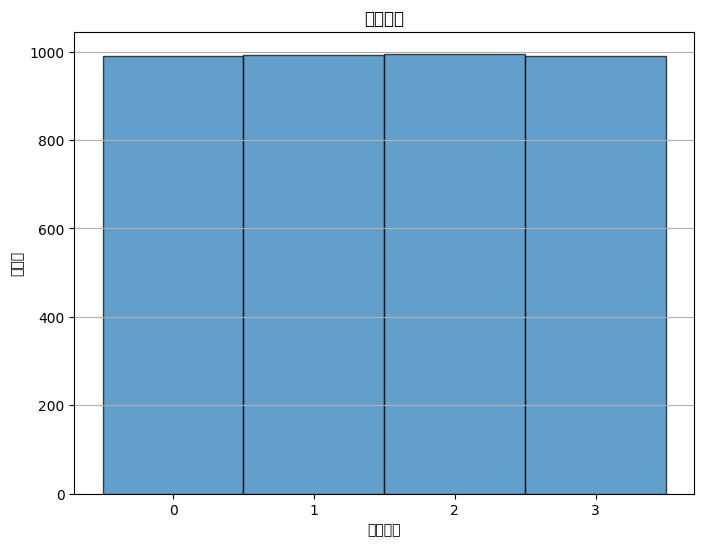

In [ ]:
# # 데이터프레임 생성
# df_y = pd.DataFrame(y_train, columns=['종합등급'])

# # 히스토그램 그리기
# plt.figure(figsize=(8, 6))
# plt.hist(df_y['종합등급'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5], edgecolor='black', alpha=0.7)
# plt.title('종합등급')
# plt.xlabel('종합등급')
# plt.ylabel('빈도수')
# plt.xticks([0, 1, 2, 3])
# plt.grid(axis='y')
# plt.show()

#### SMOTE-Tomek

In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.combine import SMOTETomek

# X = df1.drop(columns=['index','종합등급']).astype(float)
# y = df1['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # SMOTE-Tomek 적용
# smote_tomek = SMOTETomek(random_state=0)
# X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

# # 결과 확인
# print("클래스 별 개수 (트레이닝 데이터):")
# print(y_train.value_counts())

#### SMOTE-Tomek + OneSidedSelection

In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import OneSidedSelection

# # 데이터 로드
# X = df1.drop(columns=['index','종합등급']).astype(float)
# y = df1['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # SMOTE-Tomek 적용
# smote_tomek = SMOTETomek(random_state=0)
# X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# # SMOTE-Tomek 적용 후 클래스 별 개수 확인
# print("SMOTE-Tomek 적용 후 클래스 별 개수 (트레이닝 데이터):")
# print(y_train_resampled.value_counts())

# # OneSidedSelection 적용
# oss = OneSidedSelection(random_state=0)
# X_train, y_train = oss.fit_resample(X_train_resampled, y_train_resampled)

# # OneSidedSelection 적용 후 클래스 별 개수 확인
# print("\nOneSidedSelection 적용 후 클래스 별 개수 (트레이닝 데이터):")
# print(y_train.value_counts())

#### SMOTE-ENN

In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.combine import SMOTEENN

# X = df1.drop(columns=['index','종합등급']).astype(float)
# y = df1['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # SMOTE-ENN 적용
# smote_enn = SMOTEENN(random_state=0)
# X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# # 결과 확인
# print("클래스 별 개수 (트레이닝 데이터):")
# print(y_train_resampled.value_counts())

In [ ]:
y_train.value_counts()

종합등급
2    995
1    992
0    989
3    989
Name: count, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Columns: 115 entries, index to 장애인근로자수_cluster
dtypes: datetime64[ns](1), float64(84), int32(11), int64(19)
memory usage: 1.6 MB


In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import KMeansSMOTE

# X = df1.drop(columns=['index', '종합등급']).astype(float)
# y = df1['종합등급']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # KMeansSMOTE 적용 (클러스터 개수 3)
# smote = KMeansSMOTE(random_state=0, k_neighbors=2)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# !pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.6 MB/s eta 0:00:00


In [ ]:
# y_test.unique()

#### 모델 생성 및 평가

In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
# df.shape

In [ ]:
X_test

,자산총계,녹색 기업 지정,매출액,영업이익,영업이익(발표기준),당기순이익,지배주주순이익,비지배주주순이익,부채총계,자본총계,...,남성 직원 비율_cluster,여성 직원 비율_cluster,사외이사 비율_cluster,여성 임원 비율_cluster,남성 평균 연봉_cluster,여성 평균 연봉_cluster,남성 정규직 비율_cluster,여성 정규직 비율_cluster,장애인고용률_cluster,장애인근로자수_cluster
18,0.021460,0.0,0.035665,0.107372,0.107372,0.088027,0.090406,196.0,0.030868,0.011389,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
294,0.001346,0.0,0.001622,0.102050,0.102050,0.086633,0.089254,39.0,0.000609,0.001444,...,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1174,0.001480,0.0,0.003183,0.102167,0.102167,0.085833,0.088502,3.0,0.001724,0.001044,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
1703,0.001918,0.0,0.003199,0.103411,0.103411,0.086237,0.088872,27.0,0.002400,0.001251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
512,0.001301,0.0,0.001202,0.102021,0.102021,0.085826,0.088501,0.0,0.001036,0.001170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
711,0.002009,0.0,0.002978,0.101946,0.101946,0.085491,0.088551,-233.0,0.001950,0.001597,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
634,0.000628,0.0,0.001406,0.099585,0.099585,0.082626,0.085256,0.0,0.001510,0.000076,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276,0.000200,0.0,0.000563,0.101821,0.101821,0.085816,0.088491,0.0,0.000186,0.000213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1003,0.002225,0.0,0.003711,0.103006,0.103006,0.086534,0.089219,0.0,0.002969,0.001349,...,1.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1530,0.000248,0.0,0.000134,0.101763,0.101763,0.085749,0.088422,0.0,0.000105,0.000315,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
# 클래스 가중치 계산
from sklearn.utils import class_weight
class_weights = compute_class_weight(class_weight = 'balanced',
                               classes = np.unique(y_train),
                               y = y_train)
models = {
    # "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=1e-4,
    #                                 solver='adam', verbose=0, tol=1e-4, random_state=41,
    #                                 learning_rate_init=.1),
    "Random Forest Classifier": RandomForestClassifier(class_weight=dict(enumerate(class_weights)), random_state=0),
#    "linear_model.LinearRegression()":linear_model.LinearRegression(),
    # "KNN": KNeighborsClassifier(),
#    "Support Vector Classifier": SVC(class_weight=dict(enumerate(class_weights)), random_state=41),
    # 다른 모델들도 필요에 따라 class_weight 파라미터를 추가해줍니다.
    "Gradient Boosting": GradientBoostingClassifier(random_state=0, n_estimators = 120),
    # "Decision Tree Classifier": DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), random_state=41),
    # "Bagging": BaggingClassifier(random_state=41),
    "Extra Trees Classifier": ExtraTreesClassifier(class_weight=dict(enumerate(class_weights)), random_state=0),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=0),
    "XGB Classifier": xgb.XGBClassifier(seed=0),
    'LGBM': LGBMClassifier(random_state=0),
    'CatBoost': CatBoostClassifier(random_state=0, verbose=0),

}
lst_feature_importances = []

lst_pred = []
# 각 모델의 정확도를 출력합니다.
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, 'feature_importances_'):
        lst_feature_importances.append(model.feature_importances_)
    else:
        lst_feature_importances.append(name)  # 예외 처리: 해당 모델에 feature_importances_ 속성이 없으면 None 추가

    accuracy = accuracy_score(y_test,y_pred)
    lst_pred.append(y_pred)
    f1_scores = f1_score(y_test,y_pred, average='macro')
    recall_scores = recall_score(y_test,y_pred, average='macro')

    # 커스텀 정확도 계산
    print("{} Mean Cross-Validation Accuracy Score: {} f1score:{} recall{}".format(name, accuracy, f1_scores, recall_scores))

Random Forest Classifier Mean Cross-Validation Accuracy Score: 0.8177215189873418 f1score:0.5916101442417232 recall0.5508951083486215
Gradient Boosting Mean Cross-Validation Accuracy Score: 0.8354430379746836 f1score:0.6986914496920816 recall0.6741073994980448
Extra Trees Classifier Mean Cross-Validation Accuracy Score: 0.8025316455696202 f1score:0.5670240347557984 recall0.5427175991033484
Hist Gradient Boosting Mean Cross-Validation Accuracy Score: 0.8227848101265823 f1score:0.5158769801626945 recall0.5161813983367189
XGB Classifier Mean Cross-Validation Accuracy Score: 0.8531645569620253 f1score:0.743403080333257 recall0.7029640336205782
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27823
[LightGBM] [Info] Number of data points in the train set: 3965, number of u

# **기타**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, f1_score, recall_score
# import xgboost as xgb

# # XGBClassifier 하이퍼파라미터 그리드 정의
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [50, 100, 150],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # XGBoost 모델 정의
# xgb_model = xgb.XGBClassifier(random_state=0)

# # GridSearchCV를 사용하여 하이퍼파라미터 튜닝
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
#                            scoring='f1_macro', cv=3, verbose=1, n_jobs=-1)

# # 모델 학습
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("최적 하이퍼파라미터:", grid_search.best_params_)
# print("최고 F1 점수:", grid_search.best_score_)

# # 최적의 모델로 테스트 데이터 예측
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # 정확도 및 F1 점수 계산
# accuracy = accuracy_score(y_test, y_pred)
# f1_scores = f1_score(y_test, y_pred, average='macro')
# recall_scores = recall_score(y_test, y_pred, average='macro')

# print("테스트 정확도: ", accuracy)
# print("테스트 F1 점수: ", f1_scores)
# print("테스트 Recall 점수: ", recall_scores)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# cm = confusion_matrix(y_test,lst_pred[6])

# # 혼동 행렬 시각화
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lst_feature_importances[4]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df

,Feature,Coefficient
63,지배주주지분가치,0.305663
87,사외이사 비율,0.145227
43,N지배주주지분,0.117882
84,target_ESG,0.051115
45,N부채총계,0.027110
59,wage_increase_percentage,0.013284
57,재무_value,0.013251
25,지속가능경영 보고서공시여부,0.011506
67,총 PBR변화율,0.010639
77,시가총액_유보율,0.008683


## 하이퍼 파라미터 & 과적합 검증

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, f1_score, recall_score

# # GradientBoostingClassifier의 하이퍼파라미터 그리드 정의
# param_grid_gbm = {
#     'n_estimators': [100, 120, 150],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5]
# }

# # GradientBoostingClassifier 모델 생성
# gbm_model = GradientBoostingClassifier(random_state=41)

# # GridSearchCV 설정
# grid_search_gbm = GridSearchCV(estimator=gbm_model,
#                                 param_grid=param_grid_gbm,
#                                 scoring='f1_macro',
#                                 cv=5,
#                                 n_jobs=-1,
#                                 verbose=2)

# # GridSearchCV 적합
# grid_search_gbm.fit(X_train, y_train)

# # 최적의 파라미터 및 점수 출력
# print("최적의 Gradient Boosting 파라미터: ", grid_search_gbm.best_params_)
# print("최고 F1 점수: ", grid_search_gbm.best_score_)

# # 최적의 추정기를 사용하여 예측
# best_gbm_model = grid_search_gbm.best_estimator_
# y_pred_gbm = best_gbm_model.predict(X_test)


# # 모델 평가
# accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
# f1_score_gbm = f1_score(y_test, y_pred_gbm, average='macro')
# recall_score_gbm = recall_score(y_test, y_pred_gbm, average='macro')

# # 훈련 세트의 정확도 평가
# train_accuracy = grid_search_gbm.score(X_train, y_train)

# print("Gradient Boosting 분류기 정확도 (테스트 세트): ", accuracy_gbm)
# print("Gradient Boosting 분류기 F1 점수 (테스트 세트): ", f1_score_gbm)
# print("Gradient Boosting 분류기 재현율 점수 (테스트 세트): ", recall_score_gbm)
# print("Gradient Boosting 분류기 정확도 (훈련 세트): ", train_accuracy)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
